<h1><center> TP1 : Basic functions for Supervised Machine Learning. </center></h1>

The deadline for report submission is Tuesday, November 30th 2021.

Note: the goal of this first TP is to become familiar with 'sklearn' class in Python. In particular, we introduce most popular supervised learning algorithms. 

PART 1 is a list of commands that should be followed step by step. PART 2 is an open problem for which we are waiting for your creativity!

# Imported packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.metrics import balanced_accuracy_score, make_scorer, confusion_matrix


%matplotlib notebook

#  PART 1 -- MNIST


In the first part of TP1 we pursue the following goals:
1. Apply standard ML algorithms on a standard benchmark data
2. Learn basic means of data visualizations
3. Get familiar with sklearn's GridSearchCV and Pipeline

# Loading the data

MNIST dataset consists of black and white images of hand-written digits from $0$ to $9$ of size $28 \times 28$.
In this exercise we will work with a small from the original MNIST dataset. 

If you are interested in the whole dataset, execute the following commands
```python
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=custom_data_home)
```

Hence, the observations $(X_1, Y_1), \ldots, (X_n, Y_n)$ are such that $X_i \in \mathbb{R}^{784}$ and $Y_i \in \{0, \ldots, 9\}$. To be more precise, each component of vector $X_i$ is a number between $0$ and $255$, which signifies the intensity of black color.

The initial goal is to build a classifier $\hat g$, which receives a new image $X$ and outputs the number that is present on the image.

In [7]:
X_train = np.load('/Users/jeffreyverdiere/Documents/ENSAE MS Data Science Apprentissage Statistique/TP 1/data/mnist1_features_train.npy', allow_pickle=True)
y_train = np.load('/Users/jeffreyverdiere/Documents/ENSAE MS Data Science Apprentissage Statistique/TP 1/data/mnist1_labels_train.npy', allow_pickle=True)
X_test = np.load('/Users/jeffreyverdiere/Documents/ENSAE MS Data Science Apprentissage Statistique/TP 1/data/mnist1_features_test.npy', allow_pickle=True)
y_test = np.load('/Users/jeffreyverdiere/Documents/ENSAE MS Data Science Apprentissage Statistique/TP 1/data/mnist1_labels_test.npy', allow_pickle=True)
#zh
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
n_samples, n_features = X_train.shape # extract dimensions of the design matrix
#print('Train data contains: {} samples of dimension {}'.format(n_samples, n_features))
#print('Test data contains: {} samples'.format(X_test.shape[0]))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jeffreyverdiere/Documents/ENSAE MS Data Science Apprentissage Statistique/TP 1/data/mnist1_features_train.npy'

In [19]:
X_train.shape


(2000, 784)

# Looking at the data

Since each observation is actually an image, we can visualize it.

<IPython.core.display.Javascript object>


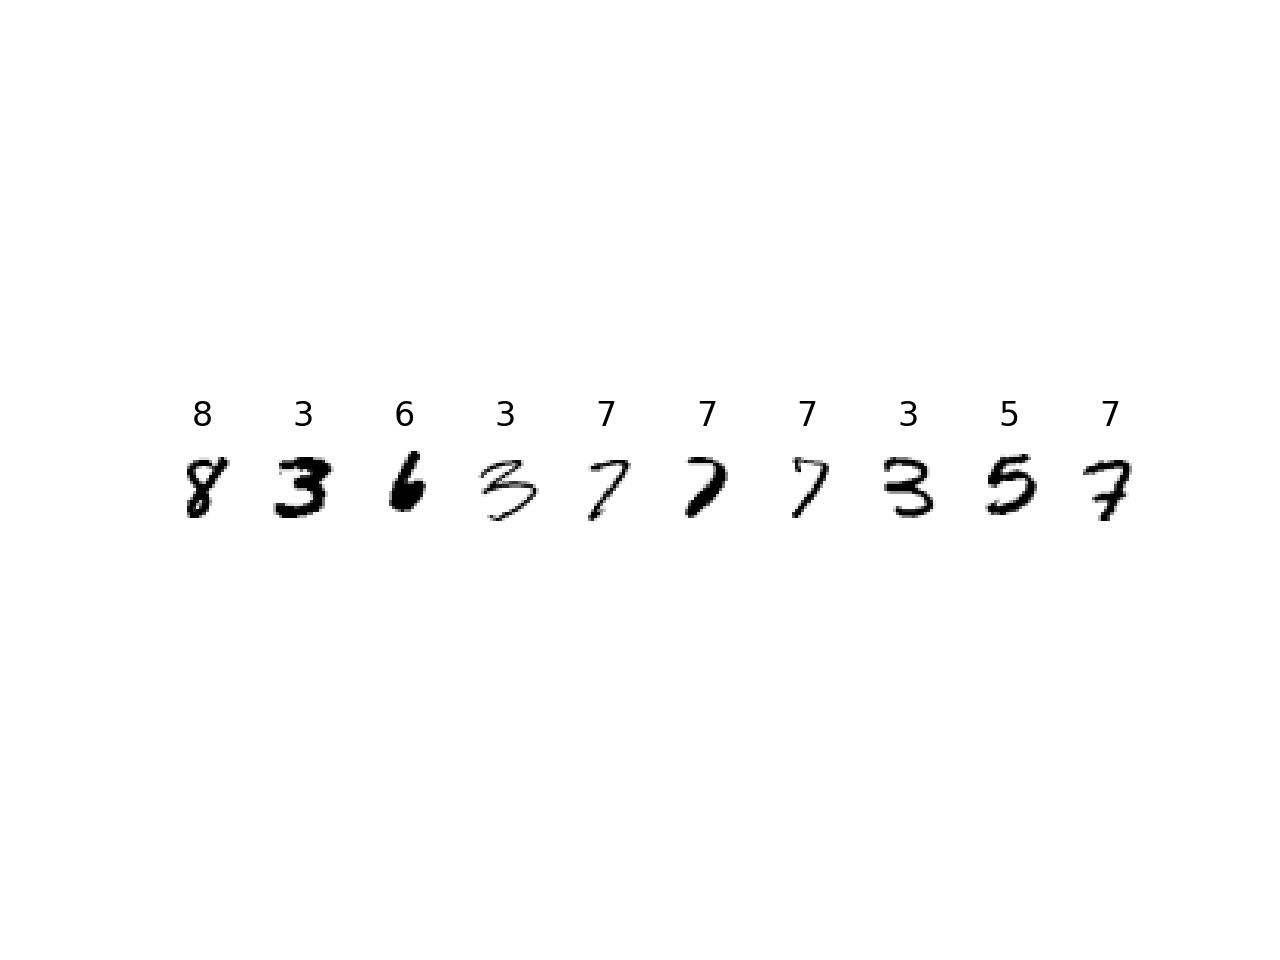

In [20]:
axes = plt.subplots(1, 10)[1]  # creates a grid of 10 plots

# More details about zip() function here https://docs.python.org/3.3/library/functions.html#zip
images_and_labels = list(zip(X_train, y_train)) 
for ax, (image, label) in zip(axes, images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('{}'.format(label))

In [21]:
for i in range(10):
    print('Number of {}s in the train dataset is {}'.format(i, np.sum([y_train == str(i)])))

Number of 0s in the train dataset is 196
Number of 1s in the train dataset is 226
Number of 2s in the train dataset is 214
Number of 3s in the train dataset is 211
Number of 4s in the train dataset is 187
Number of 5s in the train dataset is 179
Number of 6s in the train dataset is 175
Number of 7s in the train dataset is 225
Number of 8s in the train dataset is 186
Number of 9s in the train dataset is 201


From the above we conclude that the dataset is rather balanced, that is, each class contains similar amount of observations. The rarest class is $y = 6$ with $175$ examples and the most common class is $y = 2$ with $226$ examples

# Cross-validation with GridSearchCV


**Question:** Explain in your report what happens when we run 
```python
clf.fit(X_train, y_train)
```
What is the complexity for each of the three following cases? 

In [22]:
# GridSearchCV with kNN : a simple baseline
knn = KNeighborsClassifier() # defining classifier
parameters = {'n_neighbors': [1, 2, 3, 4, 5]} # defining parameter space
clf = GridSearchCV(knn, parameters, cv=3)
clf.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf.best_params_))
print('Best classification accuracy in train is: {}'.format(clf.best_score_))
print('Classification accuracy on test is: {}'.format(clf.score(X_test, y_test)))

Returned hyperparameter: {'n_neighbors': 1}
Best classification accuracy in train is: 0.891497944721333
Classification accuracy on test is: 0.875


**Question:** What is the test accuracy? What would be the accuracy of random guess?


**Question:** What is ``` LinearSVC()``` classifier? Which kernel are we using? What is ```C```? (this is a tricky question, try to find the answer online)

**Question:** What is the outcome of ```np.logspace(-8, 8, 17, base=2)```? More generally, what is the outcome of ```np.logspace(-a, b, k, base=m)```?

In [28]:
# SVM Classifier
svc = LinearSVC(max_iter=5000)
parameters2 = {'C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
clf2 = GridSearchCV(svc, parameters2, cv=3)
clf2.fit(X_train, y_train)


print('Returned hyperparameter: {}'.format(clf2.best_params_))
print('Best classification accuracy in train is: {}'.format(clf2.best_score_))
print('Classification accuracy on test is: {}'.format(clf2.score(X_test, y_test)))

/Users/jeffreyverdiere/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jeffreyverdiere/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jeffreyverdiere/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jeffreyverdiere/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jeffreyverdiere/opt/anaconda3/lib/python3.8/site-packages

Returned hyperparameter: {'C': 0.00390625}
Best classification accuracy in train is: 0.8095074084579332
Classification accuracy on test is: 0.795


/Users/jeffreyverdiere/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


**Question** What is the meaning of the warnings? What is the parameter responsible for its appearence?

In [24]:
# SVM Classifier + Pipeline
pipe = Pipeline([('scaler', MaxAbsScaler()), ('svc', svc)])
parameters3 = {'svc__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
clf3 = GridSearchCV(pipe, parameters3, cv=3)
clf3.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf3.best_params_))
print('Best classification accuracy in train is: {}'.format(clf3.best_score_))
print('Classification accuracy on test is: {}'.format(clf3.score(X_test, y_test)))

Returned hyperparameter: {'svc__C': 0.015625}
Best classification accuracy in train is: 0.863002432717575
Classification accuracy on test is: 0.84


**Question:** What did we change with respect to the previous run of ```LinearSVC()```?

**Question:** Explain what happens if we execute
```python
    pipe.fit(X_train, y_train)
    pipe.predict(X_test, y_test)
```

In [25]:
# Logistic regression
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(max_iter=5000))])
parameters4 = {'logreg__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
clf4 = GridSearchCV(pipe, parameters4, cv=3)
clf4.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf4.best_params_))
print('Best classification accuracy in train is: {}'.format(clf4.best_score_))
print('Classification accuracy on test is: {}'.format(clf4.score(X_test, y_test)))

Returned hyperparameter: {'logreg__C': 0.0078125}
Best classification accuracy in train is: 0.8705039372205788
Classification accuracy on test is: 0.84


**Question:** what is the difference between ```StandardScaler()``` and ```MaxAbsScaler()```? What are other scaling options available in ```sklearn```?

**Question:** using the previous code as an example achieve test accuracy $\geq 0.9$. You can use any method from sklearn package. Give a mathematical description of the selected method. Explain the range of considered hyperparamers.

# Visualizing errors

Some ```sklearn``` methods are able to output probabilities ```predict_proba(X_test)```.

**Question** There is a mistake in the following chunk of code. Fix it.

In [26]:
axes = plt.subplots(2, 4)[1]  # creates a grid of 10 plots

# More details about zip() function here https://docs.python.org/3.3/library/functions.html#zip
y_pred = clf4.predict(X_test)
j = 0 # Index which iterates over plots
for true_label, pred_label, image in list(zip(y_test, y_pred, X_test)):
    if j == 4: # We only want to look at 4 first mistakes
        break
    if true_label != pred_label:
        # Plotting predicted probabilities
        axes[1, j].bar(np.arange(10), clf4.predict_proba(image.reshape(1, -1))) 
        axes[1, j].set_xticks(np.arange(10))
        axes[1, j].set_yticks([])
        
        # Plotting the image
        axes[0, j].imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
        axes[0, j].set_xticks([])
        axes[0, j].set_yticks([])
        axes[0, j].set_title('Predicted {}'.format(pred_label))
        j += 1
        
#         plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
#         axex[1, j].plot()

<IPython.core.display.Javascript object>

TypeError: only size-1 arrays can be converted to Python scalars

# Changing the Loss function

It often happens that the accuracy is not the right way to evaluate the performance. ```sklearn``` has a large variety of other metrics both in classification and regression. See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Here we want to understand how to change the cross-validation metric with minimal effort.

In [29]:
# SVM Classifier + Pipeline + New score function

pipe = Pipeline([('scaler', MaxAbsScaler()), ('svc', svc)])
parameters4 = {'svc__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
balanced_scorer = make_scorer(balanced_accuracy_score)

clf4 = GridSearchCV(pipe, parameters3, cv=3, scoring=balanced_scorer)
clf4.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf4.best_params_))
print('Best Balanced accuracy in train is: {}'.format(clf4.best_score_))
print('Balanced accuracy on test is: {}'.format(clf4.score(X_test, y_test)))

Returned hyperparameter: {'svc__C': 0.015625}
Best Balanced accuracy in train is: 0.8612334093654231
Balanced accuracy on test is: 0.825627008328415


**Question:** What is ```balanced_accuracy_score```? Write its mathematical description.

Sometimes it is important to look at the confusion matrix of the prediction.

**Question:** What is the confusion matrix? What are the conclusions that we can draw from the ```confusion_matrix(y_test, clf4.predict(X_test))```

In [ ]:
print(confusion_matrix(y_test, clf4.predict(X_test)))

# PART 2 -- Problem

The data that we have contains images with $10$ classes. Normally, accuracy is a reasonable choice of the loss function to be optimized, but in this problem we *really* do not like when digits from $\{5, 6, 7, 8, 9\}$ are predicted to be from $\{0, 1, 2, 3, 4\}$.

**Question:** Propose a loss function that would address our needs. Explain your choice.

**Question:** Following above examples, make an ML pipeline that uses *your* loss function and finds appropriate classifiers.

When writing your report on this part, include:
   1. description of your loss function
   2. description of the pipeline
   3. description of the algorithms that you used 